<a href="https://colab.research.google.com/github/Fidelisaboke/ml-crash-course/blob/main/deep_learning/mlp_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing a Multilayer Perceptron using TensorFlow
Credits: [MLP Learning in TensorFlow - GeeksforGeeks](https://www.geeksforgeeks.org/deep-learning/multi-layer-perceptron-learning-in-tensorflow/)

- The MLP will be used on the MNIST dataset for multi-class classification

## Import required libraries

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

## Load the MNIST dataset

In [ ]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Inspect the Dataset Shape

In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


## Normalise the Image Data


In [12]:
X_train_norm = X_train.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255

## Visualise the Data

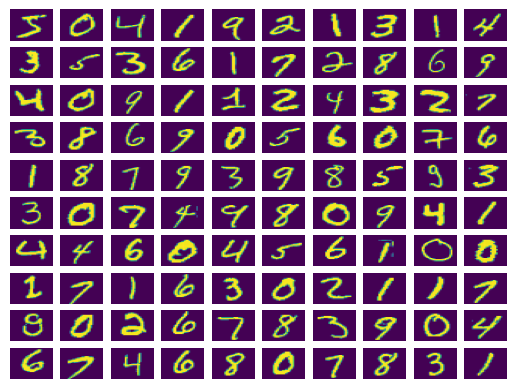

In [13]:
fig, ax = plt.subplots(10, 10)
k = 0

# Show as a 2D grid
for i in range(10):
  for j in range(10):
    ax[i][j].imshow(X_train_norm[k].reshape(28, 28), aspect='auto')
    k += 1

    # Remove the axes
    ax[i][j].axis('off')

plt.show()

## Build the Neural Network Model

In [17]:
# Sequential neural network model
model = Sequential([
    Input(shape=(28, 28, 1)),          # Input layer with 28x28 grayscale images
    Flatten(),                         # Reshape the 2D input into a 1D array
    Dense(256, activation='relu'),     # 256 fully connected neurons
    Dense(128, activation='relu'),     # 128 fully connected neurons
    Dense(10, activation='softmax')    # Output layer with 10 neurons (digits 0-9)
])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and Train the Model

In [20]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history = model.fit(
    X_train_norm,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2
)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9917 - loss: 0.0293 - val_accuracy: 0.9758 - val_loss: 0.0864
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9954 - loss: 0.0185 - val_accuracy: 0.9750 - val_loss: 0.0882
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9966 - loss: 0.0142 - val_accuracy: 0.9772 - val_loss: 0.0877
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9964 - loss: 0.0136 - val_accuracy: 0.9786 - val_loss: 0.0822
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9981 - loss: 0.0086 - val_accuracy: 0.9772 - val_loss: 0.0884
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9985 - loss: 0.0078 - val_accuracy: 0.9765 - val_loss: 0.0892
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.9790 - val_loss: 0.0872
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9792 - v

## Model Evaluation

### Assessing Model Performance on Test Data

In [21]:
results = model.evaluate(X_test_norm, y_test)
print(f"X_test loss: {results[0]}")
print(f"X_test accuracy: {results[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9774 - loss: 0.0972
X_test loss: 0.07802920043468475
X_test accuracy: 0.9812999963760376


### Visualisation of the Training and Validation Loss vs Accuracy

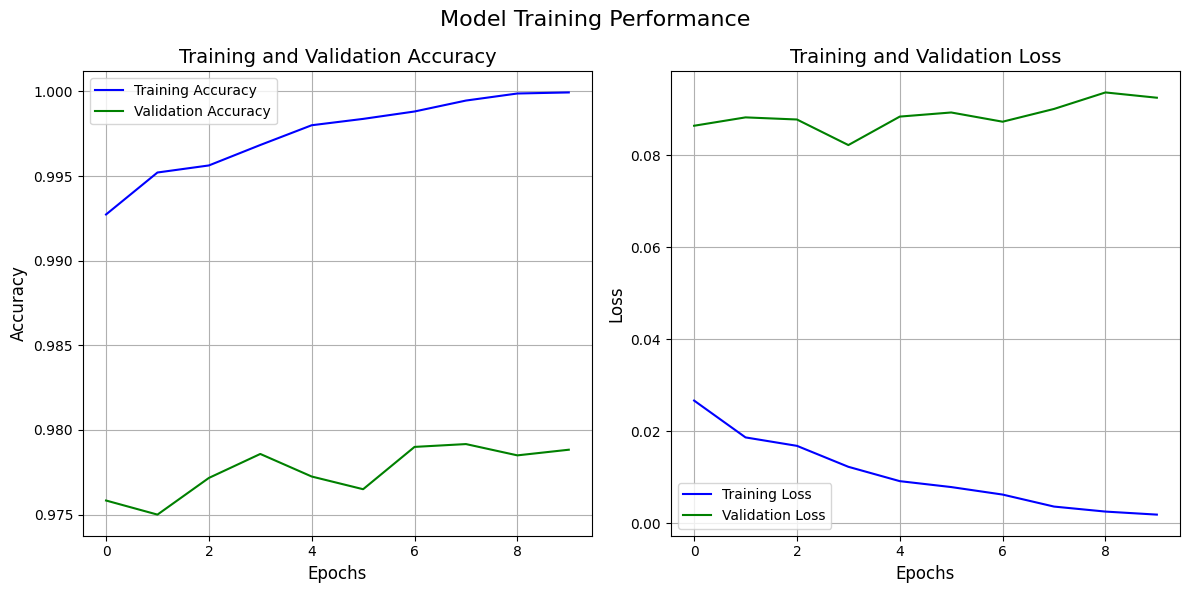

In [23]:
# Get training loss and accuracy from model history
train_acc = history.history['accuracy']
train_loss = history.history['loss']

# Get validation loss and accuracy from model history
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='green')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

### Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


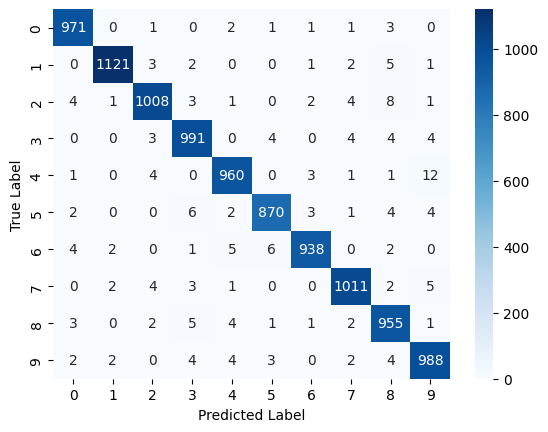

In [25]:
cm = tf.math.confusion_matrix(y_test, model.predict(X_test_norm).argmax(axis=1))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=np.arange(10),
    yticklabels=np.arange(10)
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()